In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D, Reshape, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

##Fake News

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/DEEP_LEARNING/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

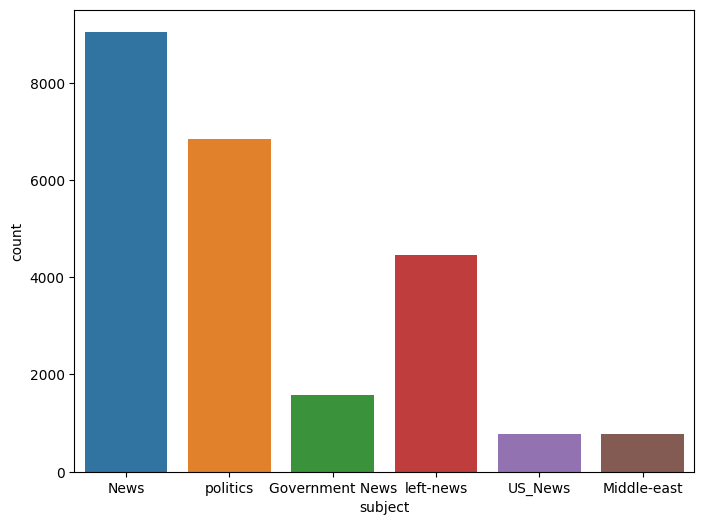

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'subject',data=fake)

##WordCloud

In [ ]:
text = ' '.join(fake['text'].tolist())

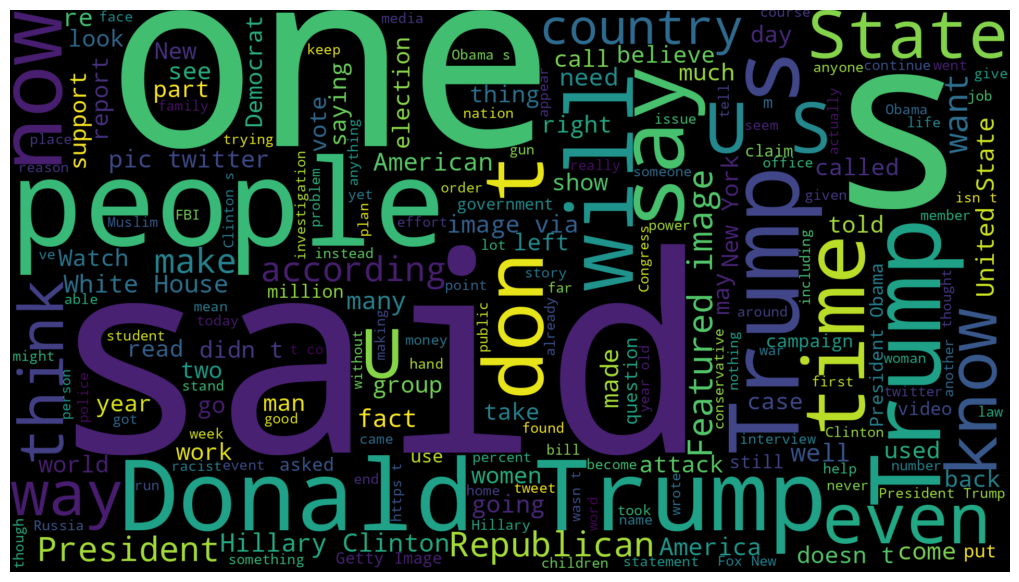

In [ ]:
wordcloud = WordCloud(background_color = 'black',width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##Real News

In [ ]:
real = pd.read_csv('/content/drive/MyDrive/DEEP_LEARNING/True.csv')

In [ ]:
text = ' '.join(real['text'].tolist())

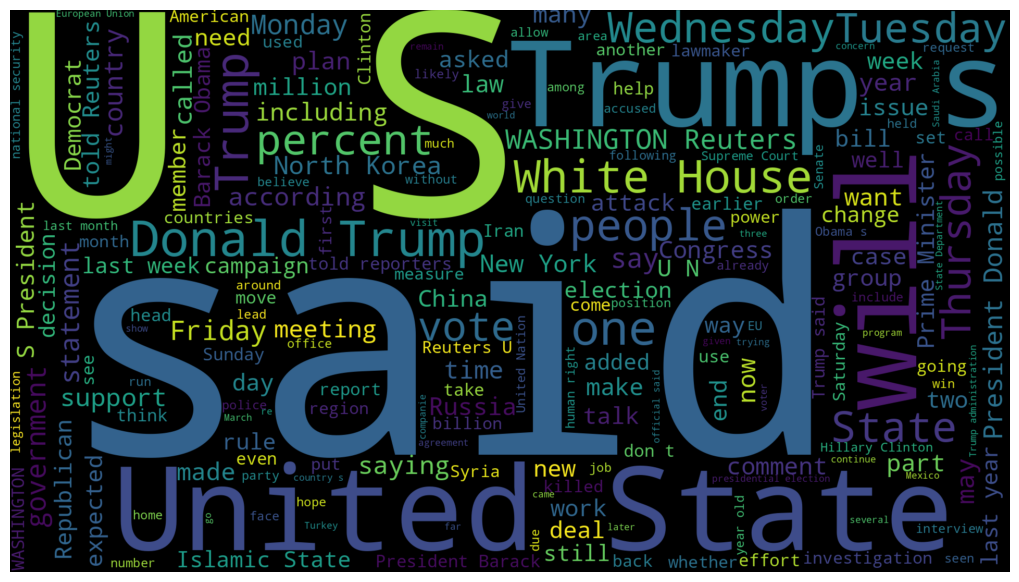

In [ ]:
wordcloud = WordCloud(background_color = 'black',width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##Cleaning Data

In [ ]:
real.sample(5)

,title,text,subject,date
7812,Hacked emails raise possibility of Clinton Fou...,"SEATTLE, Wash. (Reuters) - Hacked emails publi...",politicsNews,"October 14, 2016"
21240,"France's Macron says his job not 'cool', cites...",PARIS (Reuters) - France s young new president...,worldnews,"August 30, 2017"
8183,"In Pennsylvania, Trump to propose childcare de...",WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"September 13, 2016"
9935,"Six years after BP spill, U.S. sets new offsho...",WASHINGTON (Reuters) - The Obama administratio...,politicsNews,"April 14, 2016"
15300,"U.S. firm Air Products, China's Yankuang plan ...","BEIJING (Reuters) - A top Chinese coal miner, ...",worldnews,"November 9, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
    try:
        record = row.split('-', maxsplit=1)
        record[1]
        assert len(record[0]) < 120
    except:
        unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
    else:
        record = row.split('-', maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())


In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
print(f"Total Records:\t{real.shape[0]}")

for key,count in real.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


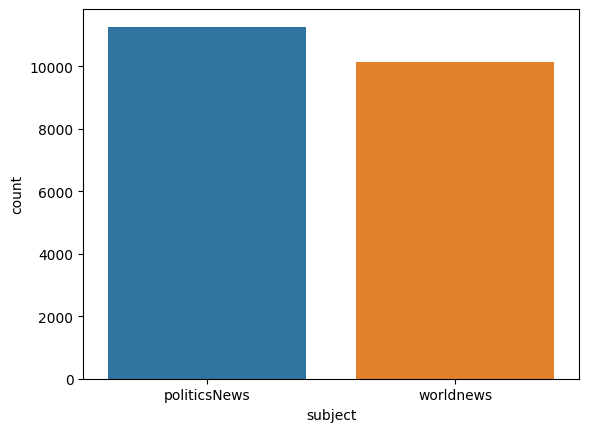

In [ ]:
sns.countplot(x="subject", data=real)
plt.show()

In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

##Preprocessing Text of Data

In [ ]:
real ['class'] = 1
fake ['class'] = 0

In [ ]:
real.columns


Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text', 'subject', 'class']]

In [ ]:
fake = fake[['text', 'subject', 'class']]

In [ ]:
data = real.append(fake, ignore_index = True)

In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.sample(5)

,text,subject,class
2203,charlottesville violence tests trump's preside...,politicsNews,1
31795,syrian muslim immigrant hairdresser slits fema...,politics,0
30580,trump’s national security speech reveals polic...,politics,0
16759,putin-trump meeting not yet planned for asia s...,worldnews,1
35040,trump campaign manager nails interview with le...,politics,0


##Removing Special Characters

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
2023-06-13 06:53:31.177783: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import preprocess_kgptalkie as prepro

In [ ]:
data['text'] = data['text'] .apply(lambda x:  prepro.remove_special_chars(x))

In [ ]:
data.head()


,text,subject,class
6162,its made in vietnam at inauguration origin of ...,politicsNews,1
14523,turkey pulls troops out of nato exercise over ...,worldnews,1
23258,trump builds helipad at maralago so he can avo...,News,0
24622,trump laughably claims he knows more about cyb...,News,0
546,jpmorgans dimon says trump likely to be a onet...,politicsNews,1


##Vectorization -- Word2Vec

In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
y = pd.get_dummies(y)

In [ ]:
y

,0,1
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
44892,0,1
44893,0,1
44894,1,0
44895,0,1


In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
print(X[0])

['its', 'made', 'in', 'vietnam', 'at', 'inauguration', 'origin', 'of', 'red', 'trump', 'hats', 'shocks', 'many', 'one', 'of', 'the', 'biggest', 'cheers', 'president', 'donald', 'trump', 'received', 'from', 'supporters', 'watching', 'his', 'inaugural', 'address', 'on', 'friday', 'was', 'his', 'call', 'to', 'buy', 'american', 'and', 'hire', 'american', 'it', 'was', 'a', 'moment', 'rich', 'in', 'irony', 'many', 'of', 'those', 'supporters', 'were', 'sporting', 'trumpstrademark', 'red', 'make', 'america', 'great', 'againbaseball', 'caps', 'that', 'were', 'made', 'in', 'china', 'vietnam', 'and', 'bangladesh', 'some', 'were', 'horrified', 'when', 'they', 'discovered', 'their', 'trump', 'hats', 'were', 'foreign', 'made', 'rob', 'walker', '44', 'who', 'had', 'driven', 'to', 'washington', 'from', 'georgia', 'with', 'his', 'wife', 'abby', '36', 'had', 'stopped', 'at', 'a', 'truck', 'stop', 'on', 'the', 'wayto', 'buy', 'a', 'make', 'america', 'great', 'again', 'cap', 'oh', 'god', 'i', 'hope', 'its

In [ ]:
DIM = 50
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.key_to_index)

231872

In [ ]:
vocab_size = len(w2v_model.wv.key_to_index)
print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 231872


In [ ]:
w2v_model.wv['corona']

array([ 0.05632016, -0.00926005,  0.03563785,  0.06395101, -0.12024434,
       -0.01659134,  0.1174859 ,  0.107577  ,  0.05585315,  0.00655969,
        0.08539444, -0.00304664, -0.00232671, -0.01077756, -0.01801421,
       -0.01360932, -0.01809911,  0.12813908, -0.08146875, -0.10827317,
        0.15854138,  0.03043941,  0.12313326,  0.00133044, -0.10468341,
       -0.02604421, -0.00392123,  0.06357648, -0.11490548,  0.03461511,
       -0.04716002,  0.04732127,  0.07365054,  0.01532862, -0.06043253,
        0.04529544,  0.07741628, -0.06000108, -0.0180047 ,  0.01474019,
        0.00883133,  0.00824249, -0.01860814, -0.00163668,  0.08423373,
       -0.06966299,  0.0467706 , -0.03532435,  0.03146013,  0.02476138],
      dtype=float32)

In [ ]:
w2v_model.wv.most_similar('china')

[('beijing', 0.9101422429084778),
 ('taiwan', 0.8900856971740723),
 ('chinas', 0.8137430548667908),
 ('chinese', 0.7826065421104431),
 ('pyongyang', 0.7761536836624146),
 ('japan', 0.7560685873031616),
 ('india', 0.7299273610115051),
 ('beijings', 0.7198459506034851),
 ('xi', 0.6986920833587646),
 ('diplomatic', 0.6874504089355469)]

In [ ]:
w2v_model.wv.most_similar('virus')

[('zika', 0.9435417056083679),
 ('ebola', 0.8434751629829407),
 ('outbreak', 0.822953999042511),
 ('disease', 0.8168328404426575),
 ('cdc', 0.8044970631599426),
 ('infection', 0.792556881904602),
 ('mosquito', 0.7855600118637085),
 ('mosquitoes', 0.7741530537605286),
 ('transmitted', 0.7683295607566833),
 ('transmission', 0.7598004341125488)]

In [ ]:
w2v_model.wv.most_similar(positive = ["corona","china", "virus"])

[('flesheating', 0.6994081139564514),
 ('equatorial', 0.6854270100593567),
 ('poncin', 0.6555351614952087),
 ('india', 0.6539592146873474),
 ('shipper', 0.6507503986358643),
 ('cdc', 0.6505138874053955),
 ('cholera', 0.647734522819519),
 ('lanka', 0.6414244771003723),
 ('196983', 0.6390228271484375),
 ('lumber', 0.6361970901489258)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
X[0][:10]

[55, 128, 6, 1888, 27, 1591, 5042, 3, 1331, 14]

In [ ]:
#tokenizer.word_index

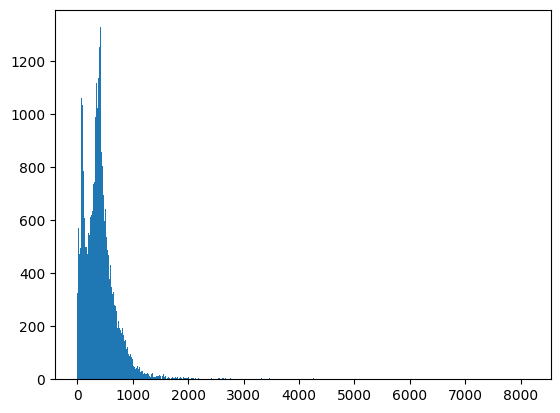

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
maxlen = 100

X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[101])

100

In [ ]:
vocab_size = len(tokenizer.word_index)

In [ ]:
vocab_size

231872

In [ ]:
def get_weight_matrix(model):
    vocab_size = len(model.wv)
    embedding_size = model.vector_size
    weight_matrix = np.zeros((vocab_size, embedding_size))
    for i, word in enumerate(model.wv.index_to_key):
        weight_matrix[i] = model.wv.get_vector(word)
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
len(w2v_model.wv)

231872

In [ ]:
w2v_model.vector_size

50

In [ ]:
embedding_vectors.shape

(231872, 50)

In [ ]:
learning_rate = 0.01

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate)
bidirec_model = keras.Sequential()
bidirec_model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
bidirec_model.add(Dropout(0.2))
bidirec_model.add(tf.keras.layers.Bidirectional(layers.LSTM(100, return_sequences=True), input_shape=(5, 10)))
bidirec_model.add(Dropout(0.2))
bidirec_model.add(tf.keras.layers.Bidirectional(layers.LSTM(50, return_sequences=False), input_shape=(5, 10)))
bidirec_model.add(Dropout(0.2))
bidirec_model.add(Dense(16, activation='relu'))
bidirec_model.add(Dense(2, activation='sigmoid'))

bidirec_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [ ]:
bidirec_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 50)           11593600  
                                                                 
 dropout_33 (Dropout)        (None, 100, 50)           0         
                                                                 
 bidirectional_20 (Bidirecti  (None, 100, 200)         120800    
 onal)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 100, 200)          0         
                                                                 
 bidirectional_21 (Bidirecti  (None, 100)              100400    
 onal)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 100)             

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
bidirec_model.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks=[early_stopping])

Epoch 1/100
947/947 [==============================] - 26s 20ms/step - loss: 0.2523 - accuracy: 0.8962 - val_loss: 0.1411 - val_accuracy: 0.9510
Epoch 2/100
947/947 [==============================] - 18s 19ms/step - loss: 0.1702 - accuracy: 0.9350 - val_loss: 0.1252 - val_accuracy: 0.9590
Epoch 3/100
947/947 [==============================] - 18s 19ms/step - loss: 0.1591 - accuracy: 0.9397 - val_loss: 0.1277 - val_accuracy: 0.9549
Epoch 4/100
947/947 [==============================] - 17s 18ms/step - loss: 0.1598 - accuracy: 0.9390 - val_loss: 0.1172 - val_accuracy: 0.9581
Epoch 5/100
947/947 [==============================] - 18s 19ms/step - loss: 0.1535 - accuracy: 0.9417 - val_loss: 0.1370 - val_accuracy: 0.9457
Epoch 6/100
947/947 [==============================] - 17s 18ms/step - loss: 0.1606 - accuracy: 0.9389 - val_loss: 0.1257 - val_accuracy: 0.9602
Epoch 7/100
947/947 [==============================] - 18s 19ms/step - loss: 0.1663 - accuracy: 0.9355 - val_loss: 0.1187 - val_ac

In [ ]:
y_pred = (bidirec_model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 4s 7ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.946369710467706

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5877
           1       0.93      0.96      0.94      5348

   micro avg       0.95      0.95      0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225
 samples avg       0.95      0.95      0.95     11225



In [ ]:
x = ['Deep Learning LSTM']

In [ ]:
X_test

array([[ 1595,     3,  3015, ...,   297,   181,   269],
       [  113,    15,   204, ...,    26,  2557,    63],
       [  189,    21,   293, ...,  1593,     2, 21080],
       ...,
       [ 3310,   477,  4770, ...,     4,  1288, 10176],
       [  227,    33,    36, ...,  1941,    16,    46],
       [  136,   566,    82, ...,     1,  1885,    13]], dtype=int32)

In [ ]:
x = ['this is news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(bidirec_model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 3s 10ms/step


array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [ ]:
x = ['this is news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(bidirec_model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 27ms/step


array([[1, 0]])

In [ ]:
x = ['A total of 9,107 fresh coronavirus infections were recorded in the country from May 29 to June 4, 2023, data from the Department of Health (DOH) showed on Monday.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 18ms/step


array([[[[0, 0, 1, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ...,
         [1, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 1, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ...,
         [1, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 1, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ...,
         [1, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 1, ..., 1, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 1, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 1, 1, ..., 1, 0, 0]],

        [[0, 0, 1, ..., 1, 0, 0],
         [0, 0, 1, ..., 1, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
    

In [ ]:
x = ['this is news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

predictions = bidirec_model.predict(x)

binary_prediction = np.argmax(predictions[0])

print(binary_prediction)


1/1 [==============================] - 0s 23ms/step
0


In [ ]:
x = ['A total of 9,107 fresh coronavirus infections were recorded in the country from May 29 to June 4, 2023, data from the Department of Health (DOH) showed on Monday.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

predictions = bidirec_model.predict(x)

binary_prediction = np.argmax(predictions[0])

print(binary_prediction)


1/1 [==============================] - 0s 28ms/step
1
